# Práctica 2 — PCA
### Importación de las librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

### Importación del dataset Iris

In [2]:
iris = datasets.load_iris()

X = iris.data   
y = iris.target
original = pd.DataFrame(X, columns=iris.feature_names) # Este es el conjunto de datos original

original, y = shuffle(original, y, random_state=42)


### Visualización del dataset

Mostramos el dataset con los valores de cada atributo.

In [3]:
original

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


Mostramos las métricas de cada uno de los atributos del dataset, para comprender la escala y dispersión de cada atributo.

In [4]:
original.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A continuación, mostramos una visualización gráfica de la distribución de los datos, utilizando la función *pairplot* de la librería *seaborn*.

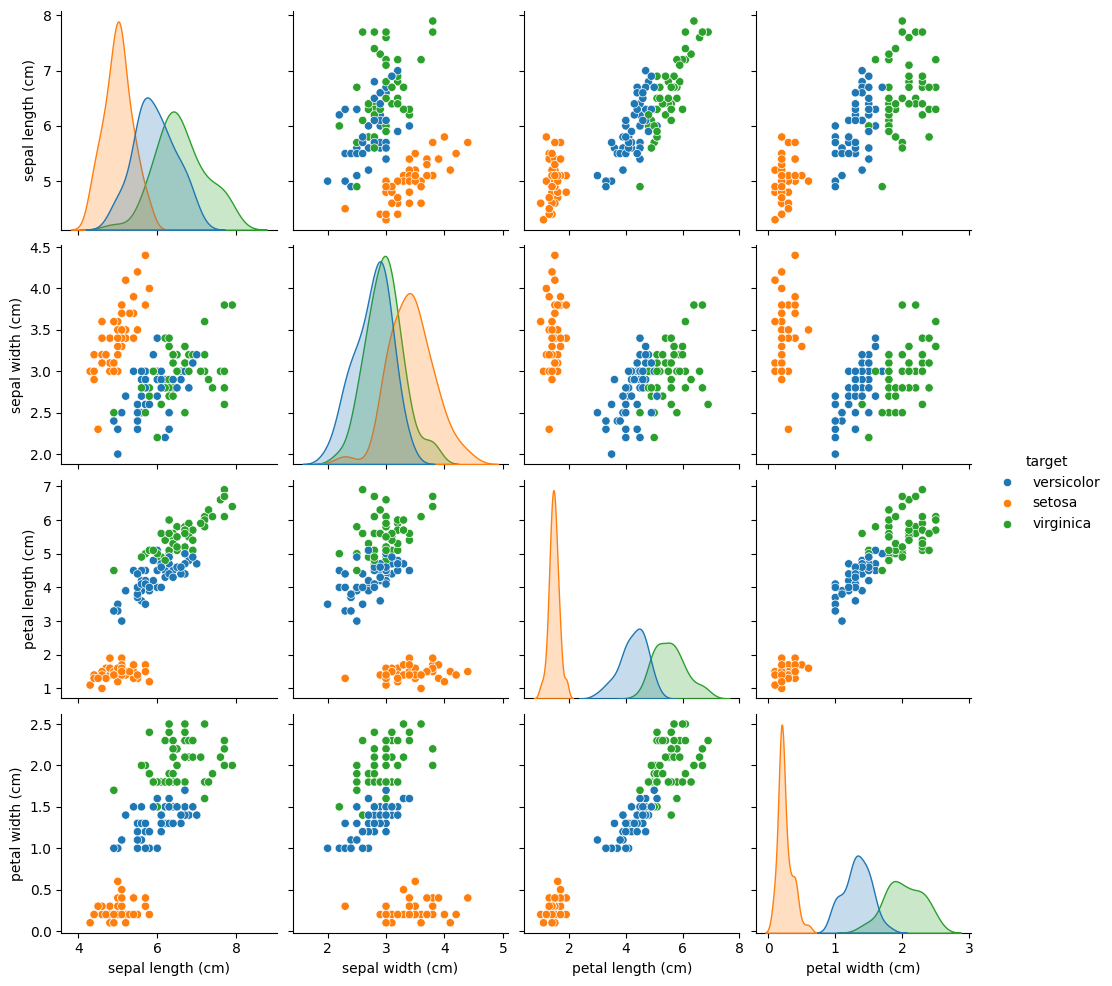

In [6]:
import seaborn as sns
original["target"] = iris.target_names[y]
_ = sns.pairplot(original, hue="target")

Quitamos la columna *target* añadida para el *pairplot* y transformamos el DataFrame a *numpy*.

In [7]:
original = original.drop("target", axis=1)
original = original.to_numpy()

Creamos una función *dibujarScatter* que utilizarmeos a continuación

In [8]:
def dibujarScatter(X, y, feature1, feature2):
    colors = ['royalblue', 'darkorange', 'limegreen']
    labels = ['setosa', 'versicolor', 'virginica']

    plt.figure(figsize=(8, 6))
    plt.clf()

    for i, color in enumerate(colors):
        plt.scatter(
            X[y == i, 0],
            X[y == i, 1],
            color=color,
            edgecolor='k',
            label=labels[i]
        )

    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(loc='upper left')
    plt.show()

### Estandarización

Vamos a estandarizar el conjunto de datos a escala unitaria, es decir: 
$
\\
\hspace{1cm}    media = 0
\hspace{1cm}    varianza = 1
$

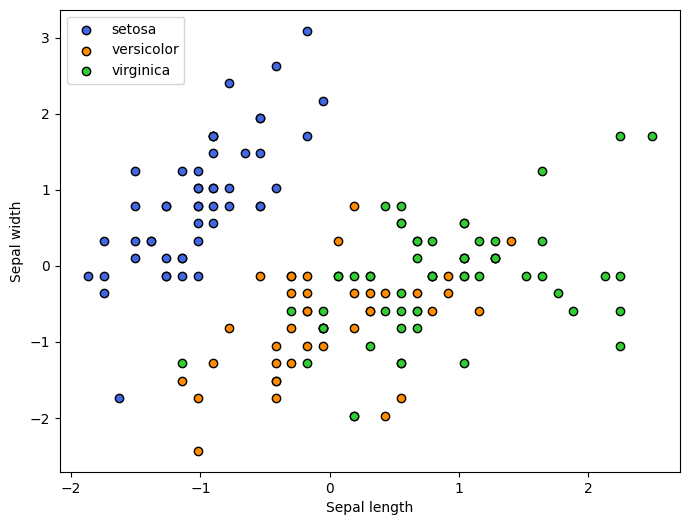

In [10]:

# Obtenemos el conjunto de datos estandarizado
standarized = StandardScaler().fit_transform(original)

# Mostrar la distribucion de los datos escalados utilizando la longitud y el ancho del sepalo
dibujarScatter(standarized, y, "Sepal length", "Sepal width")

Otra alternativa posible a la estandarización es normalizar los datos a un rango [0,1], para poder reducir su escala.

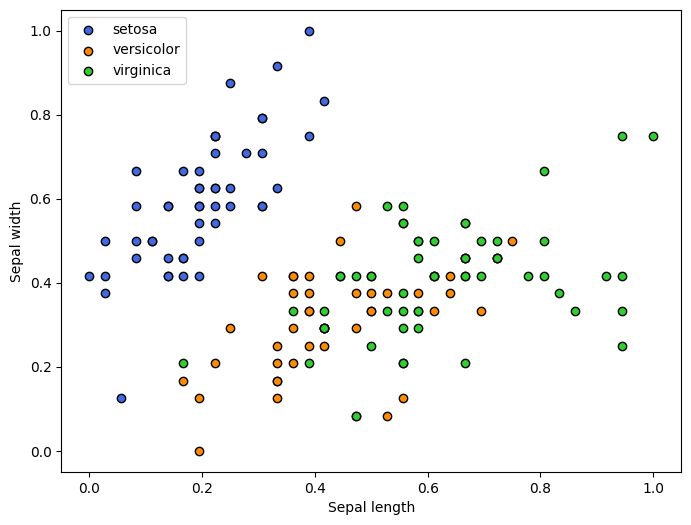

In [12]:
# Obtenemos el conjunto de datos normalizado
normalized = MinMaxScaler().fit_transform(original)

# Mostrar la distribucion de los datos escalados utilizando la longitud y el ancho del sepalo
dibujarScatter(normalized, y, "Sepal length", "Sepal width")

### Calculo de Componentes Principales (PCA)

Vamos a aplicar la técnica de PCA a los conjuntos de los datos que hemos obtenido, para poder reducir su dimensionalidad, manteniendo la máxima información posible. Probaremos con dos ajustes distintos, uno que mantenga una varianza explicada de hasta el 95%, y otro que se quede en 80%.

In [13]:
def mostrar_pca(pca, pca_data, y, ax, title=""):
    if pca_data.shape[1] == 1: 
        ax.set_title(title + f"\nVarianza: {pca.explained_variance_ratio_[0]*100:.2f}%")
        ax.scatter(pca_data[:, 0], np.zeros(pca_data.shape[0]), c=y, cmap=plt.cm.Set1, edgecolor="k")
        ax.set_xlabel("Componente principal 1")

    elif pca_data.shape[1] == 2:
        total_var = (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100
        ax.set_title(title + f"\nVarianza total: {total_var:.2f}%")
        ax.scatter(pca_data[:, 0], pca_data[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
        ax.set_xlabel("Componente 1")
        ax.set_ylabel("Componente 2")

    else:
        ax.text(0.5, 0.5, "Más de 2 componentes", ha='center', va='center')

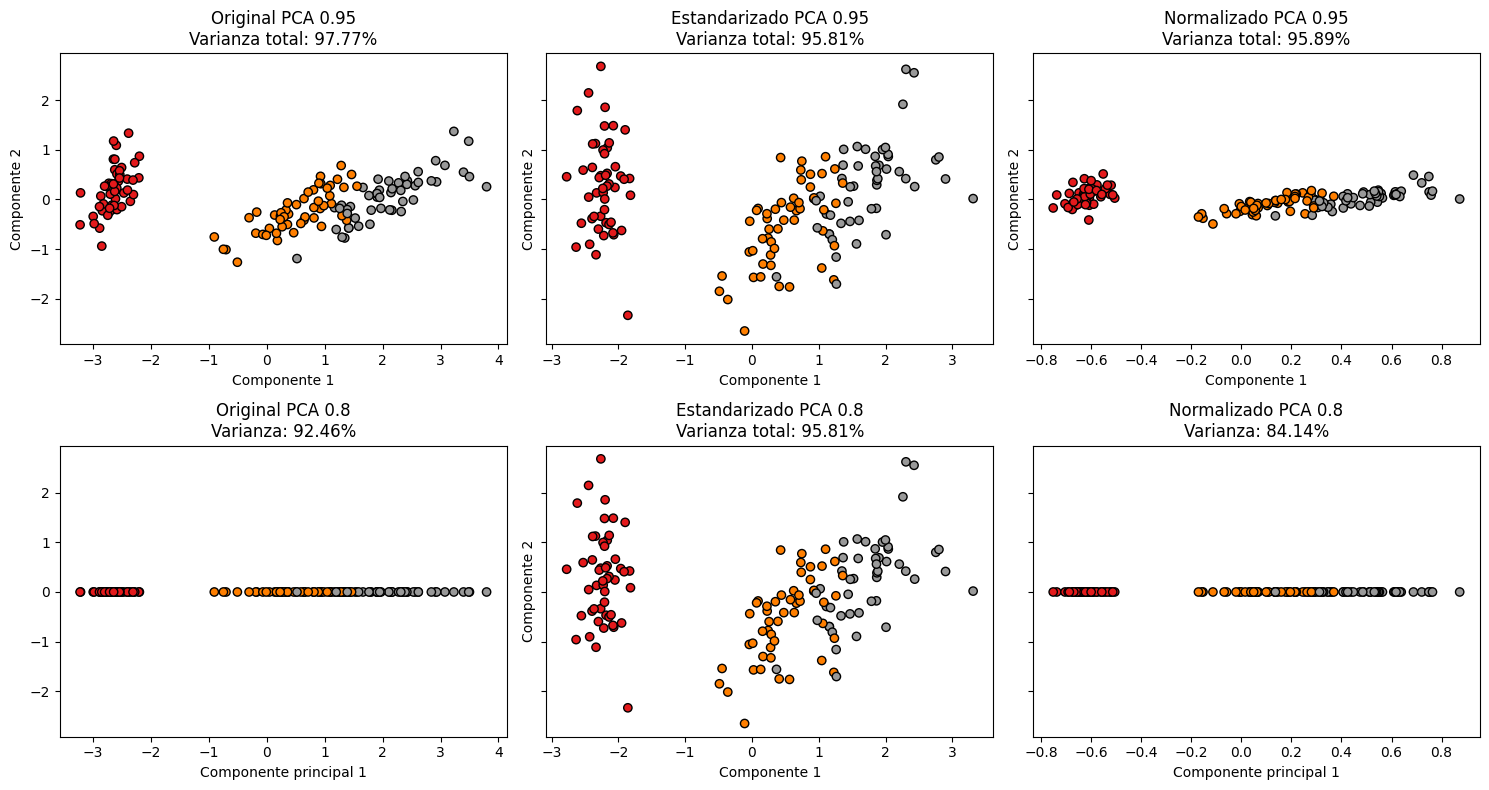

In [14]:
pca95 = PCA(n_components=0.95)
pca80 = PCA(n_components=0.8)

# Creamos una sola figura con 6 subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=True)

# PCA 0.95
original_pca95 = pca95.fit_transform(original)
standarized_pca95 = pca95.fit_transform(standarized)
normalized_pca95 = pca95.fit_transform(normalized)

mostrar_pca(pca95, pca95.fit_transform(original), y, axes[0, 0], "Original PCA 0.95")
mostrar_pca(pca95, pca95.fit_transform(standarized), y, axes[0, 1], "Estandarizado PCA 0.95")
mostrar_pca(pca95, pca95.fit_transform(normalized), y, axes[0, 2], "Normalizado PCA 0.95")

# PCA 0.8
original_pca80 = pca80.fit_transform(original)
standarized_pca80 = pca80.fit_transform(standarized)
normalized_pca80 = pca80.fit_transform(normalized)

mostrar_pca(pca80, pca80.fit_transform(original), y, axes[1, 0], "Original PCA 0.8")
mostrar_pca(pca80, pca80.fit_transform(standarized), y, axes[1, 1], "Estandarizado PCA 0.8")
mostrar_pca(pca80, pca80.fit_transform(normalized), y, axes[1, 2], "Normalizado PCA 0.8")

plt.tight_layout()
plt.show()

### Validación Cruzada

In [15]:
from sklearn.model_selection import KFold
import os

# La siguiente función implementa la validación cruzada
# y exporta los conjuntos de entrenamiento y validación 
# a formato csv.
def generate_train_test_set(kf, data, target, name):
    
    try:
        os.mkdir(path=name)
    except FileExistsError:
        pass

    for fold, (train_idx, test_idx) in enumerate(kf.split(data)):
        
        X_train = data[train_idx]
        X_test = data[test_idx]
        y_train = target[train_idx]
        y_test = target[test_idx]

        training = pd.DataFrame(
            np.concatenate((X_train, y_train.reshape(y_train.shape[0], 1)), axis=1)
        )
        test = pd.DataFrame(
            np.concatenate((X_test, y_test.reshape(y_test.shape[0], 1)), axis=1)
        )

        training.to_csv(f"{name}/training{fold + 1}_{name}.csv", index=False)
        test.to_csv(f"{name}/test{fold + 1}_{name}.csv", index=False)
    

In [16]:
n_splits = 5
kf = KFold(n_splits=n_splits)

# Original, Normalizado y Estandarizado
generate_train_test_set(kf, data=original, target=y, name="original")
generate_train_test_set(kf, data=normalized, target=y, name="norm")
generate_train_test_set(kf, data=standarized, target=y, name="stand")

# Original PCA
generate_train_test_set(kf, data=original_pca80, target=y, name="original_PCA80")
generate_train_test_set(kf, data=original_pca95, target=y, name="original_PCA95")

# Normalizado PCA
generate_train_test_set(kf, data=normalized_pca80, target=y, name="norm_PCA80")
generate_train_test_set(kf, data=normalized_pca95, target=y, name="norm_PCA95")

# Estandarizado PCA
generate_train_test_set(kf, data=standarized_pca80, target=y, name="stand_PCA80")
generate_train_test_set(kf, data=standarized_pca80, target=y, name="stand_PCA95")